<a href="https://colab.research.google.com/github/Kushal-29/FUTURE_DS_01/blob/main/Task_03_College_Event_Feedback_Analysis/Task_03_College_Event_Feedback_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("student_feedback.csv")
df.head()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student ID             1001 non-null   int64  
 1   Subject_Knowledge      1001 non-null   int64  
 2   Concept_Clarity        1001 non-null   int64  
 3   Presentation_Quality   1001 non-null   int64  
 4   Assignment_Difficulty  1001 non-null   int64  
 5   Doubt_Solving          1001 non-null   int64  
 6   Course_Structure       1001 non-null   int64  
 7   Student_Support        1001 non-null   int64  
 8   Course_Recommendation  1001 non-null   int64  
 9   Overall_Score          1001 non-null   float64
 10  Sentiment              1001 non-null   object 
dtypes: float64(1), int64(9), object(1)
memory usage: 86.2+ KB


In [4]:
df.isnull().sum()

,0
Unnamed: 0,0
Student ID,0
Well versed with the subject,0
Explains concepts in an understandable way,0
Use of presentations,0
Degree of difficulty of assignments,0
Solves doubts willingly,0
Structuring of the course,0
Provides support for students going above and beyond,0
Course recommendation based on relevance,0


In [5]:
df = df.drop(columns=["Unnamed: 0"])


In [7]:
df = df.rename(columns={
    "Well versed with the subject": "Subject_Knowledge",
    "Explains concepts in an understandable way": "Concept_Clarity",
    "Use of presentations": "Presentation_Quality",
    "Degree of difficulty of assignments": "Assignment_Difficulty",
    "Solves doubts willingly": "Doubt_Solving",
    "Structuring of the course": "Course_Structure",
    "Provides support for students going above and beyond": "Student_Support",
    "Course recommendation based on relevance": "Course_Recommendation"
})


In [8]:
df.head()

,Student ID,Subject_Knowledge,Concept_Clarity,Presentation_Quality,Assignment_Difficulty,Doubt_Solving,Course_Structure,Student_Support,Course_Recommendation
0,340,5,2,7,6,9,2,1,8
1,253,6,5,8,6,2,1,2,9
2,680,7,7,6,5,4,2,3,1
3,806,9,6,7,1,5,9,4,6
4,632,8,10,8,4,6,6,9,9


In [9]:
rating_cols = [
    "Subject_Knowledge",
    "Concept_Clarity",
    "Presentation_Quality",
    "Assignment_Difficulty",
    "Doubt_Solving",
    "Course_Structure",
    "Student_Support",
    "Course_Recommendation"
]

df["Overall_Score"] = df[rating_cols].mean(axis=1)
df[["Student ID", "Overall_Score"]].head()


,Student ID,Overall_Score
0,340,5.000
1,253,4.875
2,680,4.375
3,806,5.875
4,632,7.500


In [10]:
def sentiment_from_score(score):
    if score >= 7:
        return "Positive"
    elif score >= 4:
        return "Neutral"
    else:
        return "Negative"

df["Sentiment"] = df["Overall_Score"].apply(sentiment_from_score)
df["Sentiment"].value_counts()


,count
Sentiment,
Neutral,860
Positive,131
Negative,10


In [14]:
df[["Student ID", "Overall_Score"]].head()


,Student ID,Overall_Score
0,340,5.000
1,253,4.875
2,680,4.375
3,806,5.875
4,632,7.500


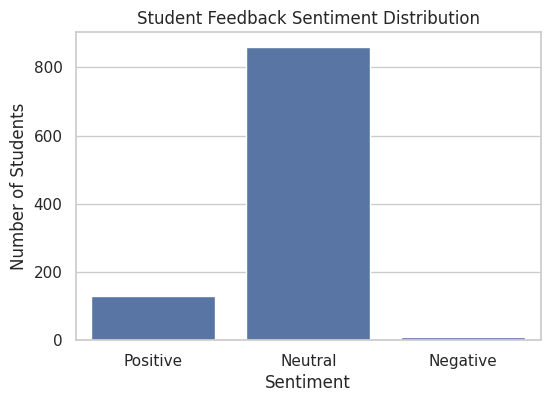

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x="Sentiment", data=df, order=["Positive", "Neutral", "Negative"])
plt.title("Student Feedback Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Students")
plt.show()


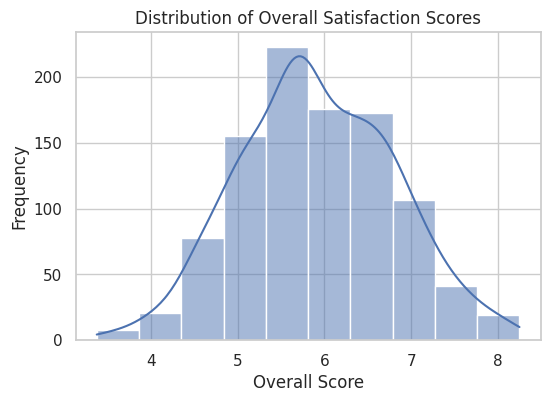

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(df["Overall_Score"], bins=10, kde=True)
plt.title("Distribution of Overall Satisfaction Scores")
plt.xlabel("Overall Score")
plt.ylabel("Frequency")
plt.show()


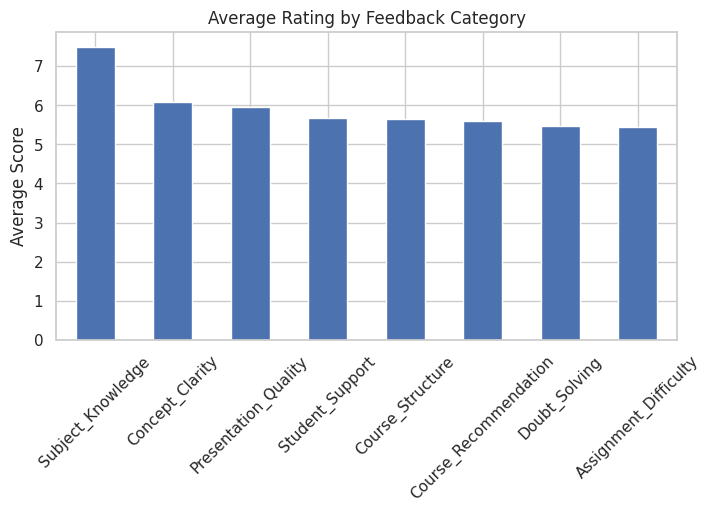

In [13]:
avg_scores = df[rating_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(8,4))
avg_scores.plot(kind="bar")
plt.title("Average Rating by Feedback Category")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()


**Key Insights**

The majority of students fall under the Neutral sentiment category, indicating moderate satisfaction with the college event/course.

A significant number of students expressed Positive sentiment, reflecting strong appreciation for subject knowledge, presentation quality, and course structure.

Very few students reported Negative sentiment, suggesting minimal dissatisfaction overall.

Categories such as Subject Knowledge and Concept Clarity received relatively higher average scores.

Lower scores were observed in areas like Assignment Difficulty and Student Support, highlighting potential improvement areas.

**Recommendations**

Enhance student engagement and interaction during sessions to convert neutral feedback into positive sentiment.

Review and optimize the difficulty level of assignments to better align with student expectations.

Strengthen student support mechanisms, such as doubt-solving sessions and mentoring.

Collect open-ended feedback in future surveys to gain deeper qualitative insights.

Use sentiment trends to continuously improve event/course planning and delivery.